### RANDOM FOREST REGRESSOR

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df=pd.read_csv('/content/sample_data/preprocessed_earthquake_data.csv')

In [4]:
X=df.drop(columns=['Magnitude','Type','Magnitude Type','Status','Source'])
y=df['Magnitude']

In [6]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred=rf_model.predict(X_val)

In [11]:
mae=mean_absolute_error(y_val,y_pred)
mse=mean_squared_error(y_val,y_pred)
r2=r2_score(y_val,y_pred)

In [13]:
print(f'Mean Absolute Error:{mae:.4f}')
print(f'Mean Squared Error:{mse:.4f}')
print(f'R2 Score:{r2:.4f}')

Mean Absolute Error:0.7180
Mean Squared Error:0.9616
R2 Score:0.1067


In [14]:
feature_importances=rf_model.feature_importances_
indices=np.argsort(feature_importances)[::-1]

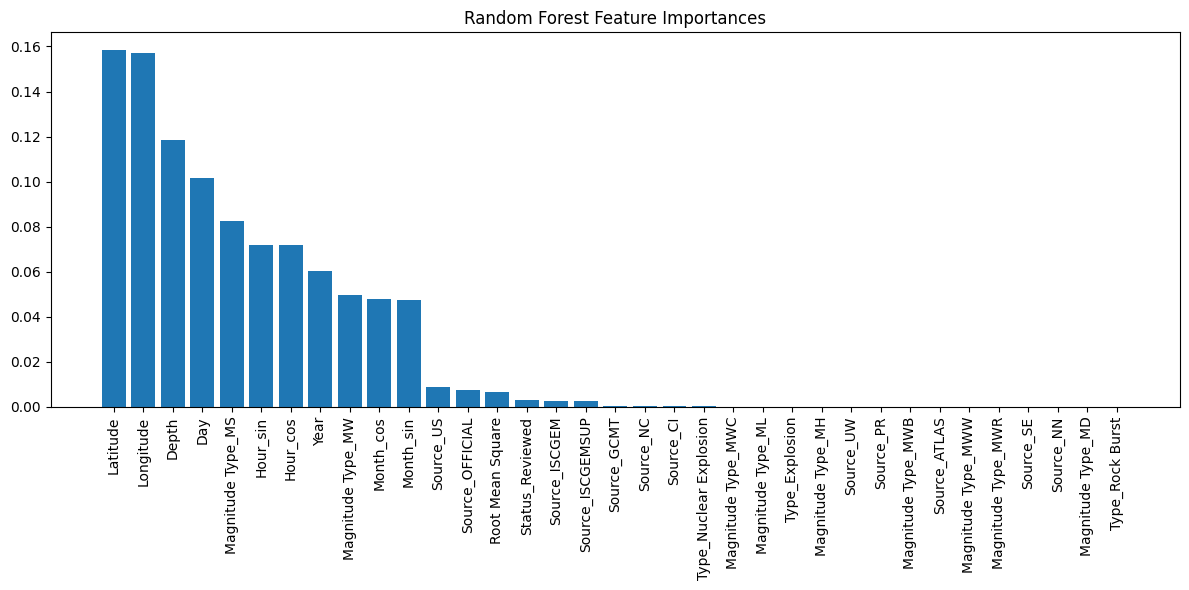

In [16]:
plt.figure(figsize=(12,6))
plt.title('Random Forest Feature Importances')
plt.bar(range(X.shape[1]),feature_importances[indices],align='center')
plt.xticks(range(X.shape[1]),X.columns[indices],rotation=90)
plt.tight_layout()
plt.show()

In [17]:
import joblib
joblib.dump(rf_model,'random_forest_earthquake_model.pkl')

['random_forest_earthquake_model.pkl']